In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC
# Read data
new_dataset_efmjieh1 = pd.read_csv("imputedfi.csv")

# Specify the variables to scale
numerical_variables = ["efagofmp", "efpvtxc", "hlev2g", "efgstxc", "efsapis", "efearng", "efagyfmp"]

# Specify categorical variables
categorical_variables = ["dwtenr", "marstp", "efmjsi"]

# List of columns to keep
columns_to_keep = numerical_variables + categorical_variables + ['fschhldm']

# Drop other columns
new_dataset_efmjieh1 = new_dataset_efmjieh1[columns_to_keep]

# Modify 'fschhldm' column
new_dataset_efmjieh1.loc[new_dataset_efmjieh1['fschhldm'] >= 1, 'fschhldm'] = 1


In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Create the target and features
y = new_dataset_efmjieh1['fschhldm']
X = new_dataset_efmjieh1.drop(columns=['fschhldm'])

# Numerical features to scale
cols_to_scale = numerical_variables

# Define pipeline for scaling numerical features and one-hot encoding categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, cols_to_scale),
        ('cat', categorical_transformer, categorical_variables)
    ]
)

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Create a mask for SMOTENC after one-hot encoding
# True for categorical features and False for numerical features
categorical_features_mask = np.concatenate(
    [np.full(len(cols_to_scale), False),
     np.full(preprocessor.transformers_[1][1].categories_[0].shape[0], True)]
)

# Apply SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_features_mask, random_state=42, sampling_strategy='minority')
X_resampled, y_resampled = smote_nc.fit_resample(X_preprocessed, y)

# Encode the labels
le = LabelEncoder()
y_resampled_ready = le.fit_transform(y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train_ready, y_test_ready = train_test_split(X_resampled, y_resampled_ready, random_state=42, stratify=y_resampled_ready)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     26545
           1       1.00      0.99      0.99     26546

    accuracy                           0.99     53091
   macro avg       0.99      0.99      0.99     53091
weighted avg       0.99      0.99      0.99     53091

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      8849
           1       0.86      0.87      0.86      8848

    accuracy                           0.86     17697
   macro avg       0.86      0.86      0.86     17697
weighted avg       0.86      0.86      0.86     17697



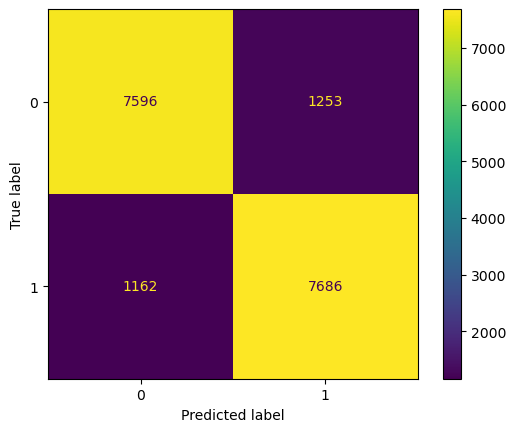

In [13]:
clf_r = RandomForestClassifier(n_estimators=700, 
                             max_depth=33, 
                             min_samples_split=2,
                             min_samples_leaf=1, 
                             random_state=42, 
                             n_jobs=-1)
clf_r.fit(X_train, y_train_ready)

# Make predictions
y_hat_train = clf_r.predict(X_train)
y_hat_test = clf_r.predict(X_test)

# Print classification reports
print(classification_report(y_train_ready, y_hat_train))
print(classification_report(y_test_ready, y_hat_test))

# Plot confusion matrix
cm = confusion_matrix(y_test_ready, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 
plt.show()

In [14]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Compute training and test accuracy
train_acc = accuracy_score(y_train_ready, y_hat_train)
test_acc = accuracy_score(y_test_ready, y_hat_test)

print("Training Accuracy: {:.2f}%".format(train_acc * 100))
print("Test Accuracy: {:.2f}%".format(test_acc * 100))

# Compute probabilities
y_train_proba = clf_r.predict_proba(X_train)[:, 1]
y_test_proba = clf_r.predict_proba(X_test)[:, 1]

# Compute ROC AUC
roc_auc_train = roc_auc_score(y_train_ready, y_train_proba)
roc_auc_test = roc_auc_score(y_test_ready, y_test_proba)

print("Training ROC AUC: {:.2f}".format(roc_auc_train))
print("Test ROC AUC: {:.2f}".format(roc_auc_test))

Training Accuracy: 99.29%
Test Accuracy: 86.35%
Training ROC AUC: 1.00
Test ROC AUC: 0.93


In [17]:
# Read the new dataset
cis2019 = pd.read_csv("imputedfi2019.csv")

# Specify the variables to scale
numerical_variables = ["efagofmp", "efpvtxc", "hlev2g", "efgstxc", "efsapis", "efearng", "efagyfmp"]

# Specify categorical variables
categorical_variables = ["dwtenr", "marstp", "efmjsi"]

# List of columns to keep
columns_to_keep = numerical_variables + categorical_variables + ['fschhldm']

# Drop other columns
cis2019 = cis2019[columns_to_keep]

# Preprocess the new dataset
cis2019.loc[cis2019['fschhldm'] >= 1, 'fschhldm'] = 1
y_cis2019 = cis2019['fschhldm']
X_cis2019 = cis2019.drop(columns=['fschhldm'])
X_cis2019_preprocessed = preprocessor.transform(X_cis2019)  # Use transform, not fit_transform

# Apply SMOTENC
X_cis2019_resampled, y_cis2019_resampled = smote_nc.fit_resample(X_cis2019_preprocessed, y_cis2019)

# Encode the labels
y_cis2019_resampled_ready = le.transform(y_cis2019_resampled)  # Use transform, not fit_transform

# Make predictions
y_hat_cis2019 = clf_r.predict(X_cis2019_resampled)

# Print classification report
print(classification_report(y_cis2019_resampled_ready, y_hat_cis2019))

# Compute accuracy
acc = accuracy_score(y_cis2019_resampled_ready, y_hat_cis2019)
print("Accuracy: {:.2f}%".format(acc * 100))

# Compute probabilities
y_cis2019_proba = clf_r.predict_proba(X_cis2019_resampled)[:, 1]

# Compute ROC AUC
roc_auc_cis2019 = roc_auc_score(y_cis2019_resampled_ready, y_cis2019_proba)
print("ROC AUC: {:.2f}".format(roc_auc_cis2019))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78     27772
           1       0.83      0.66      0.74     27772

    accuracy                           0.76     55544
   macro avg       0.77      0.76      0.76     55544
weighted avg       0.77      0.76      0.76     55544

Accuracy: 76.17%
ROC AUC: 0.85
